In [97]:
#normal tools:
from scipy import sparse
import numpy as np
import copy
import sys
sys.path.append("..")
import utils
import matplotlib.pyplot as plt

In [2]:
#load the 243-protein subset:
interaction_matrix = utils.load_subset()

In [49]:
interaction_matrix = sparse.csr_matrix(interaction_matrix)


In [71]:
a = sparse.lil_matrix((interaction_matrix.shape[0]+interaction_matrix.shape[1], 
                       interaction_matrix.shape[1]+interaction_matrix.shape[0]))
a.shape

(85923, 85923)

In [73]:
a[a.shape[0]-interaction_matrix.shape[0]:,:interaction_matrix.shape[1]] = interaction_matrix
interation_matrix = interaction_matrix.T
a[:interaction_matrix.shape[0],a.shape[1]-interaction_matrix.shape[1]:]=interaction_matrix

In [78]:
a = sparse.csr_matrix(a)

In [84]:
adj = a
adj = adj + sparse.eye(adj.shape[0])
adj = sparse.coo_matrix(adj)
row_sum = np.array(adj.sum(1))
d_inv_sqrt = np.power(row_sum, -0.5).flatten()
d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
d_mat_inv_sqrt = sparse.diags(d_inv_sqrt)
mat = d_mat_inv_sqrt.dot(adj).dot(d_mat_inv_sqrt).tocoo()
#mat = np.array(mat.todense())

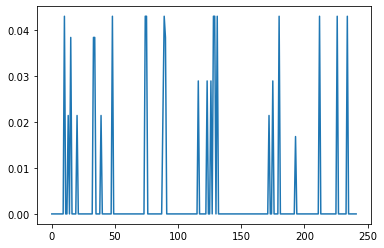

In [114]:
features=(mat**2)[a.shape[0]-interaction_matrix.shape[0]:,:interaction_matrix.shape[1]]
plt.plot(np.array(features.todense())[0])

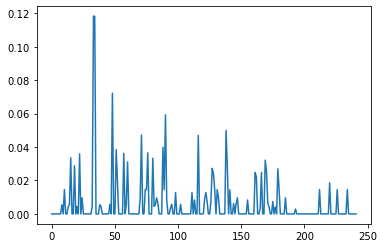

In [115]:
features=(mat**3)[a.shape[0]-interaction_matrix.shape[0]:,:interaction_matrix.shape[1]]
plt.plot(np.array(features.todense())[0])

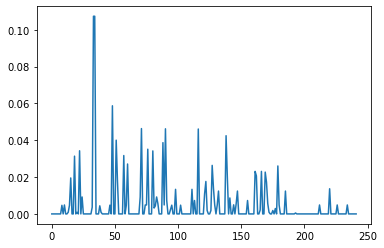

In [116]:
features=(mat**4)[a.shape[0]-interaction_matrix.shape[0]:,:interaction_matrix.shape[1]]
plt.plot(np.array(features.todense())[0])

In [118]:
features = np.array(features.todense())

In [119]:
features.shape

(85681, 242)

In [48]:
bap = np.array([[1,2,3,4,5],[6,7,8,9,10]]).T
z=np.zeros([10,10])

z[z.shape[0]-bap.shape[0]:,:bap.shape[1]]=bap
bap = bap.T
z[:bap.shape[0],z.shape[1]-bap.shape[1]:]=bap
z

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.],
       [ 0.,  0.,  0.,  0.,  0.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 4.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 5., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [40]:
z

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
z.shape[0]-bap.shape[0]

5